In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

## 1) Leemos Imagen y Convertimos a Escala de Grises

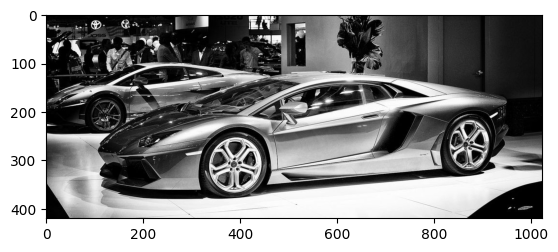

In [2]:
strImg = "img1.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

## 2) Aplicamos filtro Gaussiano de Ruido

In [3]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    
    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])

    #parte entera del centro del kernel
    step = int(len(kernel[0,:])/2)

    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = int(newPixel)
    return newImg

## 3) Derivada en X

In [4]:
def derivadaX(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    DerivadaX = np.zeros((alto, ancho, 1))
    kernel = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])
    img = convolutional_filter(img, kernel)
    for i in range(0, alto):
        for j in range(0, ancho - 1):
            derX = img[i, j + 1] - img[i, j]
            DerivadaX[i, j] = derX
    return DerivadaX

In [5]:
imgDerX = derivadaX(img)
cv2.imwrite("DerivadaX.jpg", imgDerX)

True

## 4) Calculamos Derivada en Y

In [6]:
def derivadaY(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    DerivadaY = np.zeros((alto, ancho, 1))
    kernel = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])
    img = convolutional_filter(img, kernel)
    for i in range(0, alto - 1):
        for j in range(0, ancho):
            derY = img[i + 1, j] - img[i, j]
            DerivadaY[i, j] = derY
    return DerivadaY

In [7]:
imgDerY = derivadaY(img)
cv2.imwrite("DerivadaY.jpg", imgDerY)

True

In [8]:
def magnitud(dx, dy):
    alto = img.shape[0]
    ancho = img.shape[1]
    salida = np.zeros((alto, ancho, 1))
    for i in range(0, alto):
        for j in range(0, ancho):
            mag = math.sqrt(dx[i,j]**2 + dy[i,j]**2)
            salida[i,j] = mag
    return salida

In [9]:
magnitudOut = magnitud(imgDerX, imgDerY)
cv2.imwrite("Magnitud.jpg", magnitudOut)

True

In [10]:
def fase(dx, dy):
    alto = img.shape[0]
    ancho = img.shape[1]
    salida = np.zeros((alto, ancho, 1))
    for i in range(0, alto):
        for j in range(0, ancho):
            fase = int((180/math.pi)*(math.atan2(dy[i,j], dx[i,j])))
            salida[i,j] = fase
    return salida

In [11]:
fasedOut = fase(imgDerX, imgDerY)
cv2.imwrite("Fase.jpg", fasedOut)

True

In [12]:
def non_maximum_suppression(magImage, phaseImage):
    alto = magImage.shape[0]
    ancho =  magImage.shape[1]
      
    newImg = np.zeros((alto, ancho,1))
    val1 = 0
    val2 = 0
    val3 = 0
    alpha = 0.1
    for i in range(1, alto - 2):
        for j in range(1, ancho - 2):
            ventana = magImage[i-1:i+2, j-1:j+2]
            angulo = phaseImage[i, j]
            vDerecha = magImage[i - 1, j]
            vIzquierda = magImage[i + 1, j]
            if(((angulo > 337)  or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
                val1 = ventana[1,0]
                val2 = ventana[1,1]
                val3 = ventana[1,2]
            elif(((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
                val1 = ventana[0,2]
                val2 = ventana[1,1]
                val3 = ventana[2,0]
            elif(((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
                val1 = ventana[0,1]
                val2 = ventana[1,1]
                val3 = ventana[2,1]
            elif(((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
                val1 = ventana[0,0]
                val2 = ventana[1,1]
                val3 = ventana[2,2]

            if((val2 >= val1) and (val2 >= val3)):
                newImg[i, j] = val2 
                  #newImg[i,j] = alpha*val1 + (1-alpha)*val3
                  #newImg[i, j] = 255
            else:
                newImg[i, j] = 0     
    return newImg

In [13]:
nmsOut = non_maximum_suppression(magnitudOut, fasedOut)
cv2.imwrite("nmsOut.jpg", nmsOut)

True

In [14]:
def threshold(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    cannyOut = np.zeros((alto, ancho, 1))
    
    for i in range(0, alto):
        for j in range(0, ancho):
            if(img[i,j] > 12):
                cannyOut[i,j] = 255
            else:
                cannyOut[i, j] = 0
    return cannyOut

In [15]:
cannyOut = threshold(nmsOut)
cv2.imwrite("canny.jpg", cannyOut)

True

In [16]:
edges = cv2.Canny(img, 100, 200)
cv2.imwrite("CannyOutOpenCV.jpg", edges)

True